In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt 
import numpy as np
from tensorflow.keras.layers import Input,Dense,Dropout,Flatten,Conv2D
from tensorflow.keras.models import Model


In [ ]:
fashion_mnist=tf.keras.datasets.fashion_mnist
(x_train,y_train),(x_test,y_test)=fashion_mnist.load_data()
x_train,x_test=x_train/255,x_test/255

In [ ]:
x_train=np.expand_dims(x_train,-1)
x_test=np.expand_dims(x_test,-1)
print(x_train.shape)

(60000, 28, 28, 1)


In [ ]:
i=Input(shape=x_train[0].shape)
x=Conv2D(32,(3,3),strides=2,activation='relu')(i)
x=Conv2D(64,(3,3),strides=2,activation='relu')(x)
x=Conv2D(128,(3,3),strides=2,activation='relu')(x)
x=Flatten()(x)
x=Dropout(0.2)(x)
x=Dense(512,activation='relu')(x)
x=Dropout(0.2)(x)
x=Dense(10,activation='softmax')(x)
model=Model(i,x)

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

r=model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=20)

Epoch 1/20
1875/1875 [==============================] - 30s 16ms/step - loss: 0.6971 - accuracy: 0.7443 - val_loss: 0.4201 - val_accuracy: 0.8433
Epoch 2/20
1875/1875 [==============================] - 31s 16ms/step - loss: 0.3727 - accuracy: 0.8581 - val_loss: 0.3413 - val_accuracy: 0.8725
Epoch 3/20
1875/1875 [==============================] - 32s 17ms/step - loss: 0.3107 - accuracy: 0.8800 - val_loss: 0.3272 - val_accuracy: 0.8806
Epoch 4/20
1875/1875 [==============================] - 31s 16ms/step - loss: 0.2742 - accuracy: 0.8970 - val_loss: 0.2975 - val_accuracy: 0.8922
Epoch 5/20
1875/1875 [==============================] - 31s 16ms/step - loss: 0.2467 - accuracy: 0.9079 - val_loss: 0.2948 - val_accuracy: 0.8926
Epoch 6/20
1875/1875 [==============================] - 31s 16ms/step - loss: 0.2256 - accuracy: 0.9149 - val_loss: 0.3035 - val_accuracy: 0.8950
Epoch 7/20
1875/1875 [==============================] - 31s 17ms/step - loss: 0.2087 - accuracy: 0.9192 - val_loss: 0.3073 -

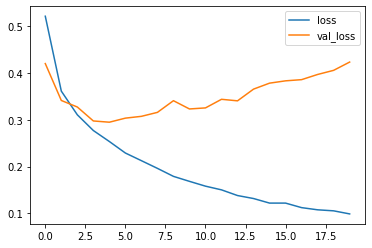

In [ ]:
plt.plot(r.history['loss'],label='loss')
plt.plot(r.history['val_loss'],label='val_loss')
plt.legend()

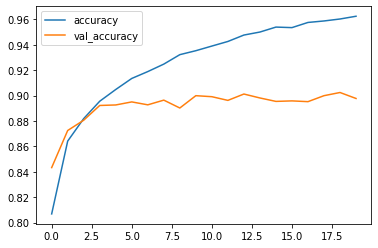

In [ ]:
plt.plot(r.history['accuracy'],label='accuracy')
plt.plot(r.history['val_accuracy'],label='val_accuracy')
plt.legend()